In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Data.csv', low_memory=False)

In [3]:
sample = df.sample(n=20000, replace=False, random_state=55)
#can't do more than 20k because of memory

In [4]:
#func taken from https://www.kaggle.com/hiramfoster/hierarchical-clustering-with-dendrograms
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

/home/dusan/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


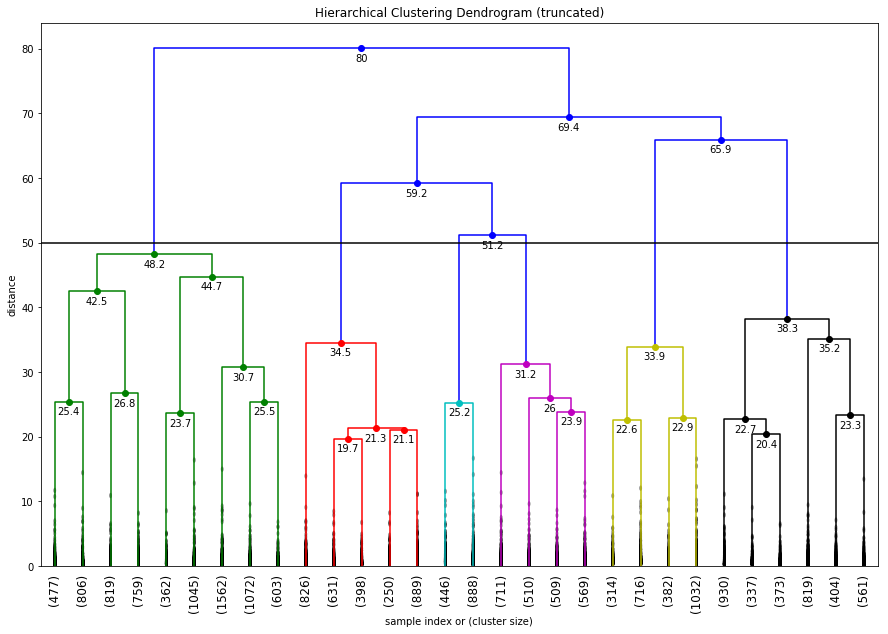

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist


#try with different possibilites
#Standard scaler:
#
#linkage:  metric:
#complete euclidean
#average  cityblock
#         cosine

#centroid, ward only euclidean
#same for MinMax

#average cityblock StandardScaler 0.6384603678094172 (1 cluster 19k)

scaler = MinMaxScaler().fit(sample) 
x = pd.DataFrame(scaler.transform(sample))

Z = linkage(x, 'ward',metric='euclidean')
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=50
)

plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster

sample['Cluster'] = fcluster(Z, t=50, criterion='distance')

#silhouette_score(x, sample['label'])

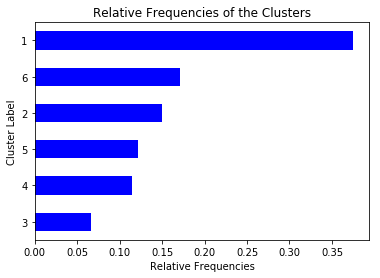

In [7]:
#frequency of every cluster
freq=sample.Cluster.value_counts(normalize=True, ascending=True)
freq.plot(kind="barh", color="Blue")
plt.title("Relative Frequencies of the Clusters")
plt.xlabel("Relative Frequencies")
plt.ylabel("Cluster Label")
plt.show()

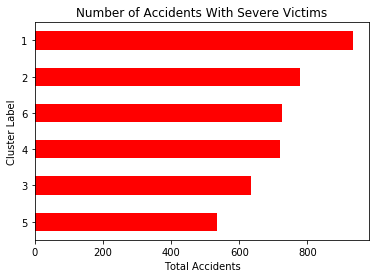

In [8]:
#number of severe victims(hospitilized or fatal injuries)
injuries=sample[(sample["severity"]==2) | (sample["severity"]==3)]
freq=injuries.Cluster.value_counts(ascending=True)
freq.plot(kind="barh", color="Red")
plt.title("Number of Accidents With Severe Victims")
plt.xlabel("Total Accidents")
plt.ylabel("Cluster Label")
plt.show()

In [9]:
tmp = sample.groupby('Cluster').count()
total = sample.Cluster.value_counts( ascending=True)
total_injured = injuries.Cluster.value_counts( ascending=True)
risk = freq/tmp.iloc[:,0]
clusters = np.arange(0,6,1)

#interection stayed 214 null
sample["intersection"] = df["intersection"].replace(0,9) #9 is other

df_injuries = pd.DataFrame({"cluster" : clusters, "total accidents" : total,
                        "total severe victims" :  total_injured,"x(%) risk" : risk*100})
df_injuries

,cluster,total accidents,total severe victims,x(%) risk
1,0,7505,935,12.458361
2,1,2994,778,25.985304
3,2,1334,636,47.676162
4,3,2299,720,31.317964
5,4,2444,536,21.931260
6,5,3424,727,21.232477


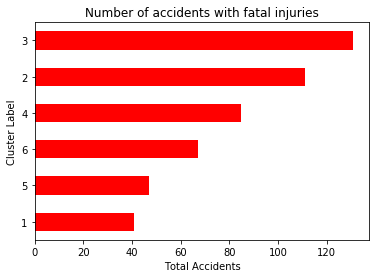

In [10]:
deaths=sample[sample["severity"]==2]
freq=deaths.Cluster.value_counts(ascending=True)
freq.plot(kind="barh", color="Red")
plt.title("Number of accidents with fatal injuries")
plt.xlabel("Total Accidents")
plt.ylabel("Cluster Label")
plt.show()

In [11]:
tmp = sample.groupby('Cluster').count()
total = sample.Cluster.value_counts( ascending=True)
total_deaths = deaths.Cluster.value_counts( ascending=True)
risk = freq/tmp.iloc[:,0]
clusters = np.arange(1,7,1)

df_deaths = pd.DataFrame({"cluster" : clusters, "total accidents" : total,
                        "total deaths" :  total_deaths,"x(%) risk" : risk*100})
df_deaths

,cluster,total accidents,total deaths,x(%) risk
1,1,7505,41,0.546302
2,2,2994,111,3.707415
3,3,1334,131,9.820090
4,4,2299,85,3.697260
5,5,2444,47,1.923077
6,6,3424,67,1.956776


In [12]:
#average values for few selected atributes
#lighting roadCategory atmosphericCondition Curve safetyEquipment
data_lighting = df.groupby(by="lighting", as_index=False).count()
data_lighting = data_lighting.iloc[:,1]/data_lighting.iloc[:,1].sum()

data_roadCategory = df.groupby(by='roadCategory', as_index=False).count()
data_roadCategory = data_roadCategory.iloc[:,1]/data_roadCategory.iloc[:,1].sum()

data_atmCond = df.groupby(by="atmosphericCondition", as_index=False).count()
data_atmCond = data_atmCond.iloc[:,1]/data_atmCond.iloc[:,1].sum()

data_curve = df.groupby(by="Curve", as_index=False).count()
data_curve = data_curve.iloc[:,1]/data_curve.iloc[:,1].sum()

data_safetyEq = df.groupby(by="safetyEquipment", as_index=False).count()
data_safetyEq = data_safetyEq.iloc[:,1]/data_safetyEq.iloc[:,1].sum()

#added in kmodes and here

data_work_day = df.groupby(by="work_day", as_index=False).count()
data_work_day = data_work_day.iloc[:,1]/data_work_day.iloc[:,1].sum()

data_holiday = df.groupby(by="near_holiday", as_index=False).count()
data_holiday = data_holiday.iloc[:,1]/data_holiday.iloc[:,1].sum()

data_reason = df.groupby(by="reasonForTraveling", as_index=False).count()
data_reason = data_reason.iloc[:,1]/data_reason.iloc[:,1].sum()

data_collision_type = df.groupby(by="collisionType", as_index=False).count()
data_collision_type = data_collision_type.iloc[:,1]/data_collision_type.iloc[:,1].sum()

In [13]:
cluster_3 = sample.loc[sample["Cluster"] == 3]

cl3_lighting = cluster_3.groupby(by="lighting", as_index=False).count()

#key={1:"Full day", 2: "Twilight or dawn", 3:"Night without public lighting",
#        4:"Night with public lighting", 5:"Night with public lighting on"}
#cl3_lighting.lighting=cl3_lighting.lighting.apply(lambda x: key[x])
cl3_lighting["pctg"] = cl3_lighting.iloc[:,1]/cl3_lighting.iloc[:,1].sum() 


cl3_roadCtg = cluster_3.groupby(by="roadCategory", as_index=False).count()

#key={1:"Highway", 2: "National Road", 3:" Departmental Road",
#        4:"Communal Way", 5:"other"}
#cl3_roadCtg.roadCategory =cl3_roadCtg.roadCategory.apply(lambda x: key[x])
cl3_roadCtg["pctg"] = cl3_roadCtg.iloc[:,1]/cl3_roadCtg.iloc[:,1].sum() 


cl3_atmCond = cluster_3.groupby(by="atmosphericCondition", as_index=False).count()
cl3_atmCond["pctg"] = cl3_atmCond.iloc[:,1]/cl3_atmCond.iloc[:,1].sum() 


cl3_curve = cluster_3.groupby(by="Curve", as_index=False).count()
cl3_curve["pctg"] = cl3_curve.iloc[:,1]/cl3_curve.iloc[:,1].sum() 


cl3_safetyEq = cluster_3.groupby(by="safetyEquipment", as_index=False).count()
cl3_safetyEq["pctg"] = cl3_safetyEq.iloc[:,1]/cl3_safetyEq.iloc[:,1].sum() 

#added for kmodes and here

cl3_work_day = cluster_3.groupby(by="work_day", as_index=False).count()
cl3_work_day["pctg"] = cl3_work_day.iloc[:,1]/cl3_work_day.iloc[:,1].sum() 

cl3_holiday = cluster_3.groupby(by="near_holiday", as_index=False).count()
cl3_holiday["pctg"] = cl3_holiday.iloc[:,1]/cl3_holiday.iloc[:,1].sum() 

cl3_reason = cluster_3.groupby(by="reasonForTraveling", as_index=False).count()
cl3_reason["pctg"] = cl3_reason.iloc[:,1]/cl3_reason.iloc[:,1].sum()

cl3_collision_type = cluster_3.groupby(by="collisionType", as_index=False).count()
cl3_collision_type["pctg"] = cl3_collision_type.iloc[:,1]/cl3_collision_type.iloc[:,1].sum()

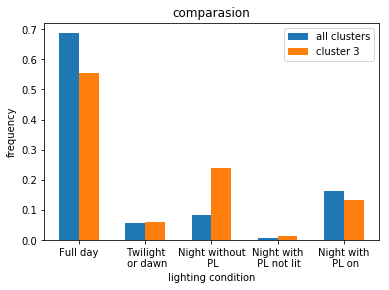

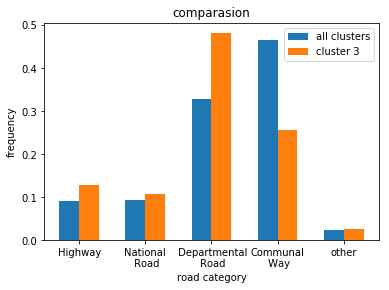

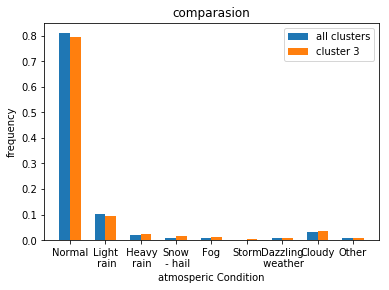

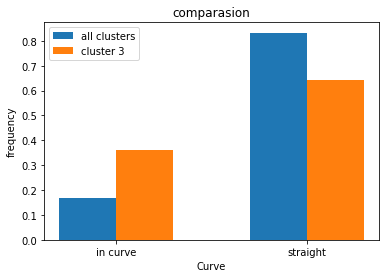

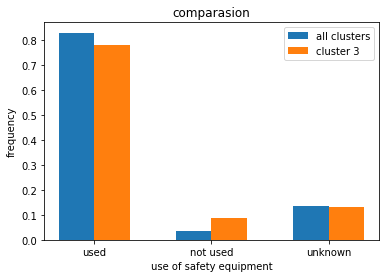

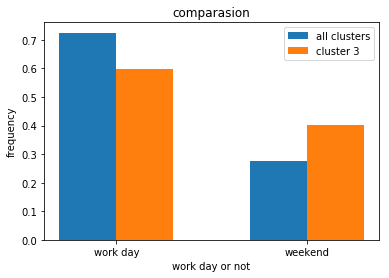

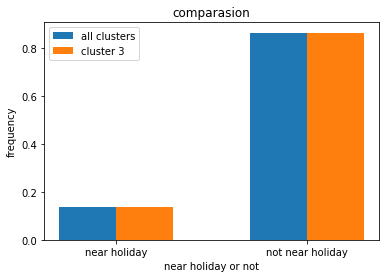

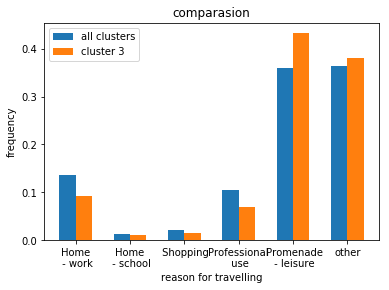

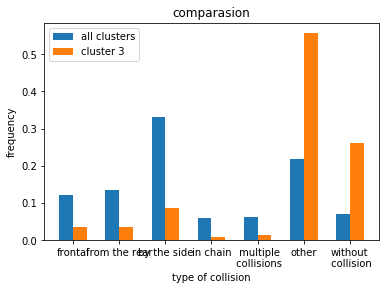

In [14]:
index = np.arange(5)
bar_width = 0.3

fig, ax = plt.subplots()
average = ax.bar(index, data_lighting, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_lighting.pctg,bar_width, label="cluster 3")

ax.set_xlabel('lighting condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Full day", "Twilight\n or dawn", "Night without\n PL",
                    "Night with\n PL not lit", "Night with\n PL on"])

ax.legend()

plt.show()


index = np.arange(5)
fig, ax = plt.subplots()
average = ax.bar(index, data_roadCategory, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_roadCtg.pctg,bar_width, label="cluster 3")

ax.set_xlabel('road category')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Highway", "National\n Road", " Departmental\n Road",
                    "Communal\n Way", "other"])

ax.legend()

plt.show()



index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_atmCond, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_atmCond.pctg,bar_width, label="cluster 3")

ax.set_xlabel('atmosperic Condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Normal", "Light\n rain", " Heavy\n rain",
                    "Snow\n - hail", "Fog\n" ,"Storm","Dazzling\n weather","Cloudy","Other"])

ax.legend()

plt.show()



index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_curve, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_curve.pctg,bar_width, label="cluster 3")

ax.set_xlabel('Curve')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["in curve", "straight"])

ax.legend()

plt.show()


index = np.arange(3)
fig, ax = plt.subplots()
average = ax.bar(index, data_safetyEq, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_safetyEq.pctg,bar_width, label="cluster 3")

ax.set_xlabel('use of safety equipment')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["used", "not used","unknown"])

ax.legend()

plt.show()

#adde in kmodes and here


index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_work_day, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_work_day.pctg,bar_width, label="cluster 3")

ax.set_xlabel('work day or not')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["work day", "weekend"])

ax.legend()

plt.show()

index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_holiday, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_holiday.pctg,bar_width, label="cluster 3")

ax.set_xlabel('near holiday or not')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["near holiday", "not near holiday"])

ax.legend()

plt.show()

index = np.arange(6)
fig, ax = plt.subplots()
average = ax.bar(index, data_reason, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_reason.pctg,bar_width, label="cluster 3")

ax.set_xlabel('reason for travelling')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Home\n - work", "Home\n - school", " Shopping",
                    "Professional\n use", " Promenade\n - leisure","other"])

ax.legend()

plt.show()



index = np.arange(7)
fig, ax = plt.subplots()
average = ax.bar(index, data_collision_type, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_collision_type.pctg,bar_width, label="cluster 3")

ax.set_xlabel('type of collision')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["frontal", "from the rear", "by the side",
                    "in chain", " multiple\n collisions","other","without\n collision"])

ax.legend()

plt.show()